## Get data and packages

In [1]:
import os

os.chdir(os.path.join(os.getcwd(), '..'))
import src.preprocessing
import src.model_training

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import time
import shap
import lightgbm as lgb
import joblib

import json
import sys

from verstack import LGBMTuner
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = src.preprocessing.get_train_data('data/data_pricing_challenge.csv')

Model Training

In [3]:
target = 'price'
variables = src.model_training.txt_load('utils/model_variables.txt')
hyperparameters = src.model_training.json_load('utils/model_hyperparameters.json')

X = df.loc[:, variables]
y = df.loc[:, [target]]

In [4]:
# Initial tune to optimize hyperparameters
# tuner = LGBMTuner(metric = 'rmse', random_state = 123)
# tuner.fit(X, y['price'])

In [5]:
X_train, X_test, y_train, y_test = src.model_training.split_dataset(df, variables, target, 0.4)

model = src.model_training.lightgbm_training(X_train, y_train, hyperparameters)

Plots and Model Performance Analysis

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

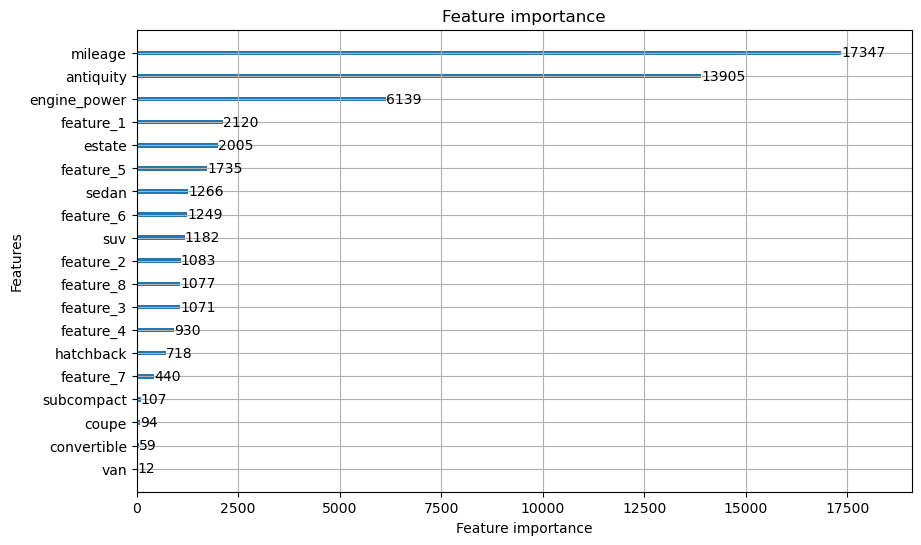

In [6]:
lgb.plot_importance(model, max_num_features=30, figsize=(10, 6))

In [7]:
src.model_training.model_results(model, X_train, X_test, y_train, y_test)

Model Results:

RMSE train: 3458.9117294167736
RMSE test: 4271.562850604626

MAE train: 1507.6476454345514
MAE test: 2200.633545415451

R2 train: 0.8559501676789949
R2 test: 0.7923210087518466


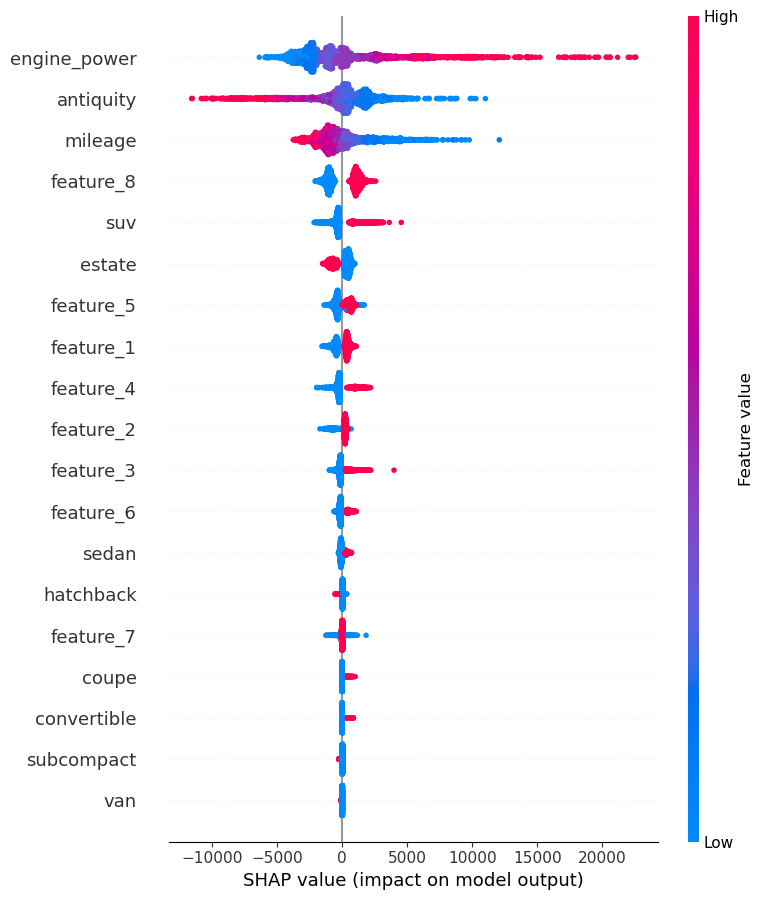

In [8]:
explainer, shap_values = src.model_training.calculate_shap_values(model, X_train)

# Visualize Shapley values
shap.summary_plot(shap_values, X_train)

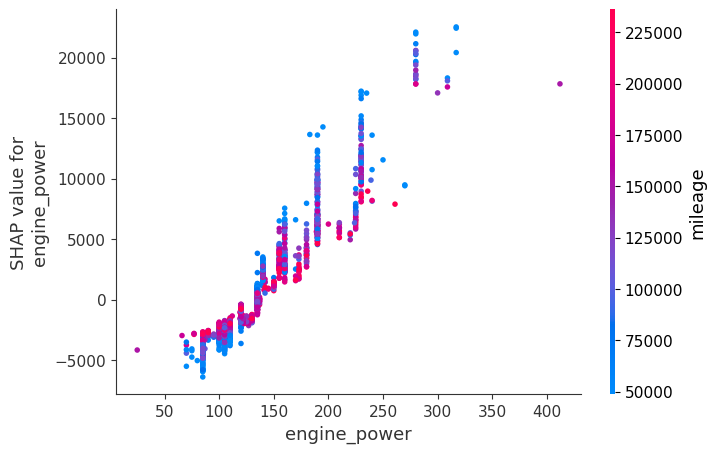

In [9]:
shap.dependence_plot("engine_power", shap_values, X_train)

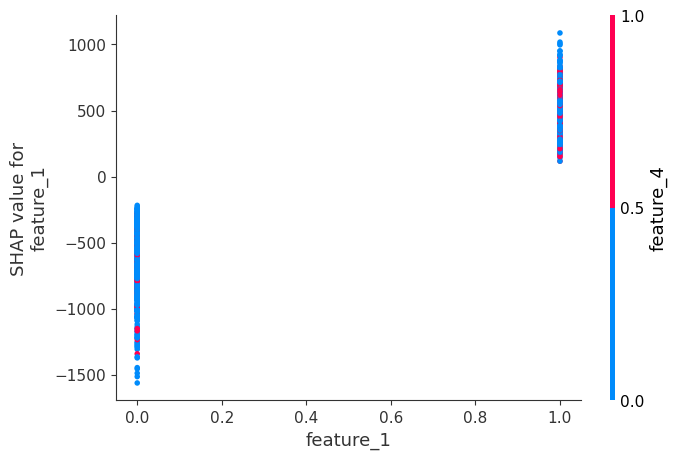

In [10]:
feature_names = X_train.columns.tolist()

# Seleccionar las variables que te interesan (puedes usar los nombres directamente)
variable1_name = 'feature_1'
variable2_name = 'feature_4'

# Encontrar los índices correspondientes a los nombres de las variables
variable1_index = feature_names.index(variable1_name)
variable2_index = feature_names.index(variable2_name)

# Crear un Dependence Plot
shap.dependence_plot(variable1_index, shap_values, X_train, feature_names=feature_names, interaction_index=variable2_index, show=False)
plt.show()